## Latar Belakang
Dalam konteks pertumbuhan positif yang dialami oleh supermarket, penting bagi manajemen untuk memahami lebih dalam perilaku dan karakteristik pelanggan mereka. Dengan pemahaman yang mendalam ini, supermarket dapat meningkatkan strategi pemasaran, mengoptimalkan penawaran produk, dan meningkatkan pengalaman pelanggan secara keseluruhan.

Oleh karena itu, sebagai Data Scientist, tugas Anda adalah untuk menganalisis data pelanggan supermarket dan mengidentifikasi segmentasi pelanggan berdasarkan perilaku dan karakteristik mereka saat berbelanja. Tujuan akhirnya adalah memberikan rekomendasi produk yang lebih personal dan relevan kepada pelanggan, meningkatkan kepuasan pelanggan, dan mendukung pertumbuhan revenue yang berkelanjutan.

Dengan pemahaman yang lebih mendalam tentang pelanggan, supermarket dapat lebih efektif dalam mempertahankan dan menarik pelanggan baru, serta memperkuat posisi mereka di pasar yang semakin kompetitif.

## Pernyataan Masalah
Sebagai perusahaan ritel yang beroperasi dalam industri supermarket, perusahaan memiliki tujuan untuk memahami karakteristik costumer yang loyal dan berharga tinggi. Dengan informasi ini, perusahaan dapat mengembangkan strategi pemasaran yang lebih efektif dan menyesuaikan layanan perusahaan untuk mempertahankan dan menarik pelanggan yang bernilai.

Dengan mempertimbangkan berbagai faktor yang mempengaruhi perilaku pembelian konsumen, perusahaan ingin seoarang data analyst untuk menjawab pertanyaan berikut:

- Apa saja ciri-ciri khas costumer yang loyal dan memiliki nilai tinggi bagi perusahaan perusahaan?
- Bagaimana perusahaan dapat mengidentifikasi segmentasi pelanggan yang membeli secara online dan offline, serta bagaimana kita dapat mengoptimalkan pengalaman mereka sesuai dengan preferensi dan kebutuhan masing-masing?

Dengan memperjelas tujuan perusahaan dalam memahami perilaku dan preferensi pelanggan, perusahaan berharap dapat mengumpulkan informasi yang lebih akurat dan relevan untuk membimbing keputusan strategis dan taktis perusahaan dalam meningkatkan loyalitas pelanggan dan pertumbuhan bisnis secara keseluruhan.

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data costumer yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK).    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind


pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait 

** People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

** Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

** Promotions
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

** Places
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last months

** Marketing
* Z_CostContact = 3 (Cost to contact a customer)
* Z_Revenue = 11 (Revenue after client accepting campaign)


Berikut 5 baris teratas dan terbawah dari dataset Supemarket Costumer.

In [2]:
df = pd.read_csv(r'C:\Users\khasu\Downloads\Supermarket Customers.csv', delimiter='\t')

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset Supermarket Costumer.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [4]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [5]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].dtypes, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Types', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Types,Number of Unique,Unique Sample
0,ID,int64,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,int64,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,object,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,float64,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,int64,3,"[0, 1, 2]"
6,Teenhome,int64,3,"[0, 1, 2]"
7,Dt_Customer,object,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,int64,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,int64,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 9

Secara umum, kita bisa melihat bahwa:
* dataset Supermarket Costumer memiliki 29 kolom dan 2240 baris
* Kategori pada kolom `education` dan `marital_status` ada banyak, lebih baik untuk disederhanakan untuk memudahkan analisis
* Kolom `Dt_Costumer` memiliki data types yang keliru, saya akan mengubahnya ke datetime
* Data kosong / nan terdapat hanya pada kolom Income
* kolom `year birth` memiliki value dari tahun lahir costumer, saya akan mengubahnya menjadi data categorical dengan categori (Adult, Elderly, Old).
* Kolom `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Complain`,  `Z_CostConatact`, `Z_Revenue` dan `Response` tidak terpakai karena tidak relevan dengan masalah yang ingin dianalisis

## Simplify Value in Columns

In [6]:
df['Education'].unique(), df['Marital_Status'].unique()

(array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object),
 array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
        'Absurd', 'YOLO'], dtype=object))

- Pada kolom `Education` saya akan mengganti value dari _2n cycle_ menjadi _Master_, karena keduanya memiliki pengertian yang sama
- Pada kolom `Marital_Status` saya akan menyederhanakan valuenya menjadi _Single_ and _Together_ 

In [7]:
df['Education'] = df['Education'].str.replace('2n Cycle', 'Master', case=False)

In [8]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married' : 'Together',
    'Divorced' : 'Single',
    'Widow' : 'Single',
    'Alone' : 'Single',
    'Absurd' : 'Single',
    'YOLO' : 'Single',
    })


## Handling Duplicated Data

In [9]:
df.duplicated().sum()

0

- Tidak ada data duplicat yang terdeteksi di dataset ini

## Handling Missing Value

In [10]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Together,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Together,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Single,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [11]:
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

<Axes: xlabel='Income', ylabel='Count'>

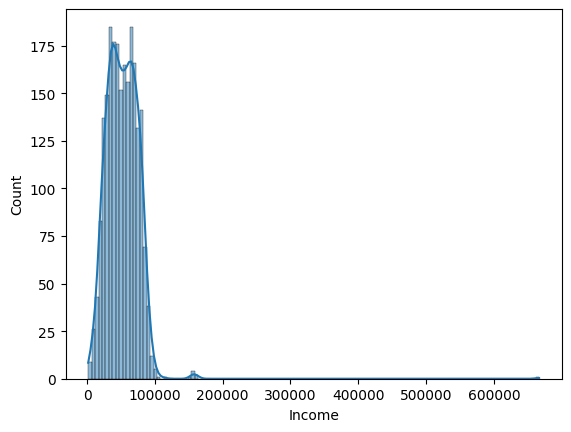

In [12]:
sns.histplot(data=df, x='Income', kde=True, label='Income')

- Distribusi data pada kolom `income` tidak terdistribusi secara normal jika dilihat dari visualisasi diatas
- Sehingga saya akan mengisi data kosong tersebut dengan nilai median dari `income` berdasarkam kepada kolom `education` dan `marital status`

In [13]:
df[df.isnull().any(axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Together,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,Master,Together,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Together,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Together,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [14]:
IncomeMed = df.groupby(['Education', 'Marital_Status'])['Income'].transform('median')

df['Income'] = df['Income'].fillna(IncomeMed)

## Change the data types of a column

In [15]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'] = df['Dt_Customer'].dt.to_period('M')


In [17]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Handling Outlier

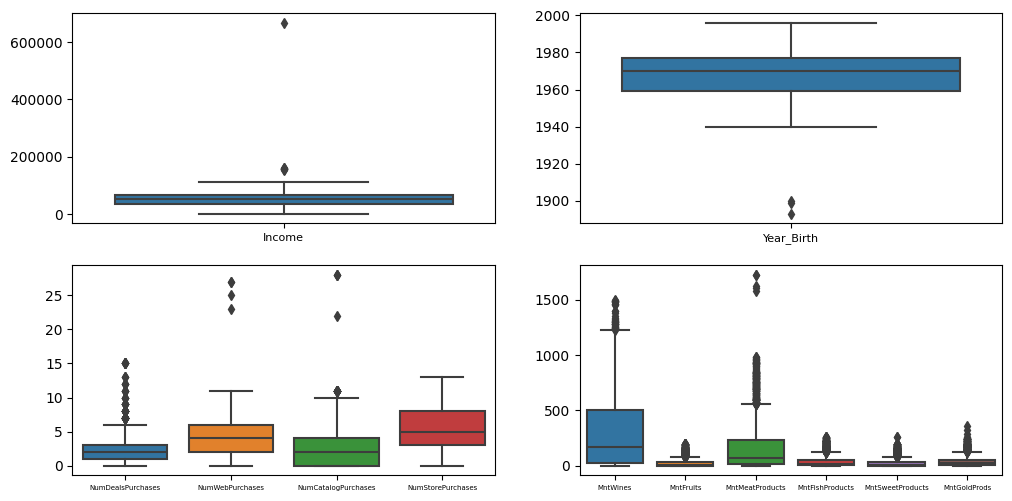

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
box_plot1 = sns.boxplot(data=df[['Income']])
box_plot1.set_xticklabels(box_plot1.get_xticklabels(), fontsize=8)

plt.subplot(2, 2, 2)
box_plot2 = sns.boxplot(data=df[['Year_Birth',]])
box_plot2.set_xticklabels(box_plot2.get_xticklabels(), fontsize=8)

plt.subplot(2, 2, 3)
box_plot2 = sns.boxplot(data=df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']])
box_plot2.set_xticklabels(box_plot2.get_xticklabels(), fontsize=5)

plt.subplot(2, 2, 4)
box_plot2 = sns.boxplot(data=df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
box_plot2.set_xticklabels(box_plot2.get_xticklabels(), fontsize=5)

plt.show()

- Dapat dilihat dari visualisasi data outlier pada beberapa colomn yang akan digunakan dalam analisis, bahwa semua column memiliki outlier
- Pada column `income`, data outlier yang ada masih masuk akal, karena sangat mungkin ada yang memiliki income dengan jumlah yang sangat tinggi
- Pada column `Year_Birth`, data outlier yang ditemukan agak janggal karena ada data costumer yang lahir pada tahun 1900 awal, Jika tahun data ini dikumpulkan yaitu 2014 maka costumer tresebut telah berumur 100 tahun lebih, mungkin saja ada tapi kasusnya sangat rare, sehingga lebih baik untuk di handling.
- Pada column `Purchases` Terdapat banyak outlier tapi masih dalam kondisi yang masuk akal
- Pada column `MntProducts` Teradapat banyak outlier tapi masih dalam keadaan yang masuk akal

<Axes: xlabel='Year_Birth', ylabel='Count'>

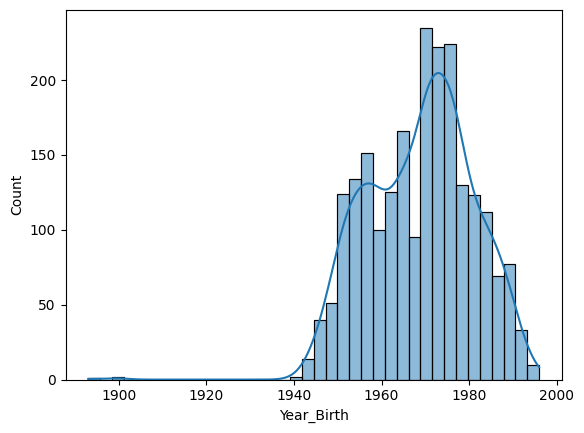

In [19]:
sns.histplot(data=df, x='Year_Birth', kde=True, label='Year_Birth')


- Karena, data pada column `Year_Birth` memiliki distribusi data yang tidak normal maka kita menhandle outliernya dengan menggantinya dengan median

In [20]:
df.loc[df['Year_Birth'] < 1940, 'Year_Birth'] = df.groupby(['Education', 'Marital_Status'])['Year_Birth'].transform('median')

## Added New Columns Relevant For The Analysis

In [21]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Together,58293.0,1,0,2014-01,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Together,61223.0,0,1,2013-06,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### Menambah Column Umur `Age` dan Age Categorical `Age_Category`

In [22]:
a = df['Dt_Customer'].unique()
a

<PeriodArray>
['2012-09', '2014-03', '2013-08', '2014-02', '2014-01', '2013-09', '2012-11',
 '2013-05', '2013-06', '2013-11', '2012-10', '2012-12', '2012-08', '2013-03',
 '2013-01', '2013-02', '2014-05', '2013-12', '2013-04', '2013-10', '2014-06',
 '2014-04', '2013-07', '2012-07']
Length: 24, dtype: period[M]

- Dapat dilihat di column `Dt_Costumer` bahwa tanggal terbaru customer enroll with supermarket ada pada tahun 2014, yang berarti bisa saya ambil kesimpulan bahwa data ini berada pada rentang tahun 2012 - 2014
- Sehingga dengan asumsi diatas, `Current_Year` dari dataset ini berarti tahun `2014`
- Saya akan mengubah column `Birth_Year` menjadi categorical dengan detail 
    - Adult = Usia 18 - 64 Tahun
    - Old = Usia 65 Tahun ke atas
- Variable `Current_Year` - column `Birth_Year` untuk mendapatkan nilai dari umur customer lalu akan dikelompokkan menjadi pengelompokkan diatas.

In [23]:

current_year = 2014
df['Age'] = current_year - df['Year_Birth']

def category_age(age):
    if age >= 18 and age <= 64:
        return 'Adult'
    elif age >= 65:
        return 'Old'
    else:
        return 'Unknown'
    
df['Age_Category'] = df['Age'].apply(category_age)

print(df[['Year_Birth', 'Age', 'Age_Category']])

      Year_Birth  Age Age_Category
0           1957   57        Adult
1           1954   60        Adult
2           1965   49        Adult
3           1984   30        Adult
4           1981   33        Adult
...          ...  ...          ...
2235        1967   47        Adult
2236        1946   68          Old
2237        1981   33        Adult
2238        1956   58        Adult
2239        1954   60        Adult

[2240 rows x 3 columns]


In [24]:
df['Age'].describe()

count    2240.000000
mean       45.097321
std        11.694121
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Age, dtype: float64

### Menambah Column `Monatery`

- Column `Monatery` berisi data yang merupakan hasil dari penjumlahan beberapa column yang dikelompokkan sebagai sebuah pembelian product
- Yang merupakan column product ialah = `['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']`

In [25]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Category'],
      dtype='object')

In [26]:
df['Monatery']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']


### Menambah Column `Frequency`

- Column `Frequency` berisi data dari penjumlahan beberapa column yang dikelompokkan menjadi `Purchase_Place`
- column yang termasuk ke dalam `Purchase_Place` ialah = `[NumDealsPurchases], [NumWebPurchases], [NumCatalogPurchases], [NumStorePurchases]`

In [27]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Category', 'Monatery'],
      dtype='object')

In [28]:
df['Frequency'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Category,Monatery,Frequency
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,Adult,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,Adult,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,Adult,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,Adult,53,8
4,5324,1981,PhD,Together,58293.0,1,0,2014-01,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,Adult,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Together,61223.0,0,1,2013-06,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,47,Adult,1341,18
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,68,Old,444,22
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33,Adult,1241,19
2238,8235,1956,Master,Together,69245.0,0,1,2014-01,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58,Adult,843,23


### Menambah Column `OnlineP` dan `OfflineP`

- Membuat column `OnlineP` yang berisi data frequency customer untuk melakukan pembelian produk dengan memanfaatkan online store, data diambil dari penjumlahan column `NumWebPurchases` dan `NumCatalogPurchases`
- Membuat column `OfflineP` yang berisi data frequency customer untuk melakukan pembelian produk dengan memanfaatkan offline store, data diambil dari penjumlahan column `NumStorePurchases`

In [37]:
df['OnlineP'] = df['NumWebPurchases'] + df['NumCatalogPurchases']
df['OfflineP'] = df['NumStorePurchases']


In [38]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Category,Monatery,Frequency,OnlineP,OfflineP
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57,Adult,1617,25,18,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,Adult,27,6,2,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,49,Adult,776,21,10,10
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,Adult,53,8,2,4
4,5324,1981,PhD,Together,58293.0,1,0,2014-01,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,Adult,422,19,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Together,61223.0,0,1,2013-06,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,47,Adult,1341,18,12,4
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,68,Old,444,22,10,5
2237,7270,1981,Graduation,Single,56981.0,0,0,2014-01,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,33,Adult,1241,19,5,13
2238,8235,1956,Master,Together,69245.0,0,1,2014-01,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,58,Adult,843,23,11,10


### Selection of columns for future analysis

- Terdapat 35 column setelah saya melakukan EDA tahap awal
- Selanjutnya, saya akan menyeleksi beberapa column sehingga tidak semua column akan digunakan untuk menjawab business problem yang ingin dianalisis

In [31]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Age_Category', 'Monatery', 'Frequency', 'OnlineP', 'OfflineP'],
      dtype='object')

In [39]:
df_analysis = ['ID', 'Age', 'Age_Category', 'Education', 'Marital_Status', 'Kidhome', 
        'Teenhome', 'Income', 'Dt_Customer', 'MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases', 'OnlineP', 
        'OfflineP', 'Recency', 'Frequency', 'Monatery' ]
df1 = df[df_analysis]

In [40]:
df1

,ID,Age,Age_Category,Education,Marital_Status,Kidhome,Teenhome,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,OnlineP,OfflineP,Recency,Frequency,Monatery
0,5524,57,Adult,Graduation,Single,0,0,58138.0,2012-09,635,88,546,172,88,88,8,10,4,18,4,58,25,1617
1,2174,60,Adult,Graduation,Single,1,1,46344.0,2014-03,11,1,6,2,1,6,1,1,2,2,2,38,6,27
2,4141,49,Adult,Graduation,Together,0,0,71613.0,2013-08,426,49,127,111,21,42,8,2,10,10,10,26,21,776
3,6182,30,Adult,Graduation,Together,1,0,26646.0,2014-02,11,4,20,10,3,5,2,0,4,2,4,26,8,53
4,5324,33,Adult,PhD,Together,1,0,58293.0,2014-01,173,43,118,46,27,15,5,3,6,8,6,94,19,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Adult,Graduation,Together,0,1,61223.0,2013-06,709,43,182,42,118,247,9,3,4,12,4,46,18,1341
2236,4001,68,Old,PhD,Together,2,1,64014.0,2014-06,406,0,30,0,0,8,8,2,5,10,5,56,22,444
2237,7270,33,Adult,Graduation,Single,0,0,56981.0,2014-01,908,48,217,32,12,24,2,3,13,5,13,91,19,1241
2238,8235,58,Adult,Master,Together,0,1,69245.0,2014-01,428,30,214,80,30,61,6,5,10,11,10,8,23,843


### Export Data

In [41]:
df1.to_csv('data_cleaning_Supermarket.csv', index = False)